# **PL/SQL Procedure**

- PL/SQL Procedure는 Application의 특정 Business Logic을 캡슐화 하여 재사용 가능한 단위.

- PL/SQL Procedure는 Oracle Database에 Schema Object로 저장된 명명 Block.


- 쉽게 설명하면 DB 단에서 특정 비즈니스 로직을 미리 지정하여 호출을 통해 언제든 재사용할 수 있는 비즈니스 로직 단위, 함수.

- Procedure는 특정 비즈니스 동작을 일괄 처리하는데 사용.

- RDBMS에서 사용하는 Module 단위 Programming.

**장점**

**DBMS 성능 향상**

- Procedure는 최초 실행될 때 Compile되고, 이후 재실행 시에는 Compile되지 않는다.

- 캡슐화된 특정 모듈 로직을 최초 한번 Compile된 후 DBMS에 Cache 저장하여 사용할 수 있는 것이다.

- 한번 Cache에 저장되면 최적화와 Compile 작업을 다시 수행하지 않는다.

- 반복되는 SQL 구문을 Procedure 생성 후 호출하여 작업하면,

- 구문분석(Parsing), 최적화(Optimizing), Complie(Optimizing) 없이 사용할 수 있어 성능상 이점을 가진다.

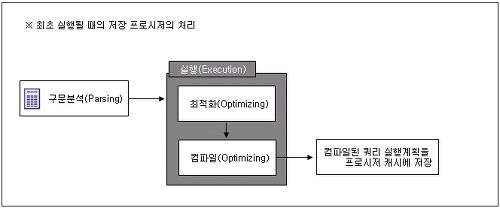

**네트워크 트래픽 감소**

- Procedure를 사용하면 단위 SQL 구문이 DBMS에 저장된다.

- 단위 구문이 수백개라고 한다면, WAS와 DB Server 사이의 수많은 트래픽을 한번의 호출로도 통신할 수 있어 네트워크 트래픽 감소의 이점을 가진다.
- DB Server 호출 횟수가 많은 복잡한 비즈니스 로직, SQL 구문일 수록 트래픽 감소량 증가

**보안 향상**

- Procedure는 각각 권한 할당이 가능.

- 보안상 접근이 까다로운 Table들을 Procedure를 통해서 접근 할 수 있도록 한 후 각각의 Procedure에 권한 할당을 통해서 외부에서의 Table 접근을 제한 및 관리 하기 용이.

**반복 작업 회피**
- 자주 사용되는 SQL 구문을 특정 Procedure로 변환하여 생성한 후 호출 하여 사용하면 반복되는 SQL 구문 작성 작업을 줄일 수 있다.

- Programming 언어에 비의존적
- WAS : Java
- DBMS : Oracle

로 구성된 Web Application이 어느 시점에, Programming 언어로 WAS단에서 Python으로 전환해야 한다고 가정. DBMS를 변경하지 않는 한 Procedure는 어떤 Programming 언어에서도 다시 사용할 수 있어, WAS단 Programming 언어에 종속되지 않고 특정 Business Logic을 사용할 수 있다.

**Procedure vs Stored Procedure**

- PL/SQL Procedure와 Stored Procedure는 저장 위치와, 호출 방법이 다르다.

**저장 위치**
- PL/SQL Procedure는 프로시저 또는 익명 블록 내에 저장.

- Stored Procedure는 DB의 모든 Schema에 저장.

**호출 방법**
- PL/SQL Procedure는 일반적인 함수 호출 처럼 호출.


```sql
EXECUTE procedure_name( arguments );
```


- Stored Procedure는 {schema}.{procedure}@database 형식으로 호출.

**in Oracle**
- Oracle DBMS의 경우 생성된 모든 PL/SQL Procedure가 DB에 저장.

-  모든 Procedure가 Stored Procedure가 된다.


- 예외적으로 Oracle Forms에서 일부 Procedure는 클라이언트-서버 모델

- 서버(Oracle DB Server)가 아닌 Forms 클라이언트의 라이브러리에 저장될 수 있다.
 - Stored Procedure와 PL/SL Procedure에 차이가 있을 수 있다.
 - 대부분의 DB User 에게는 둘 다 동일하다.

**CREATE, DECLARE**



```sql
DECLARE
	GIL_LOG VARCHAR2;
    
BEGIN
	GIL_LOG := 'Gil Log
	dbms_output.put_line(GIL_LOG);
END;
```


- 구문은 Procedure가 아닌 PL/SQL Block.

- 아래와 같이 CREATE ~~ PROCEDURE 구문을 사용해서 작성하는 구문이 Procedure이다.




```sql
CREATE OR REPlACE PROCEDURE gil_log
DECLARE
	GIL_LOG VARCHAR2;
    
BEGIN
	GIL_LOG := 'Gil Log'
	dbms_output.put_line(GIL_LOG);
END;
```

- CREATE는 일반적으로 DBMS Object CREATE OR REPLACE 포함, PL/SQL 하위 Programm인 Procedure, Function, Package들을 만드는데 사용되는 SQL문이다.

**Code Object**

- DECLARE는 PL/SQL 전용 Keyword.
- PL/SQL Block의 Declaration Statements(선언 부분)의 시작을 알리는데 사용.
- 필수 부분이 아님. 변수 선언 부분이 존재하지 않아도 됨.





**Procedure 본문**

- Procedure 본문은 세 부분으로 구성되며, 아래와 같은 형식을 지닌다.



```
[Declaration Statements]
IS

BEGIN

[Execution Statements]

EXCEPTION

[Exception Handler]

END [procedure_name];

```

- Execution Statements(실행 부분)은 필수이지만, 최소 하나의 실행 가능한 명령문을 포함 Declaration Statements, Exception Handler은 선택 사항이다.

**선언 부분, 예외 부분**

- Declaration Statements
 - Declaration Statements(선언 부분)에서는 변수, 상수, 커서등을 선언할 수 있다.

- Execution Statements
 - Execution Statements(실행 부분)은 특정 Business Logic을 구현하는 최소 하나 이상의 명령문이 포함되어 있다.

**Exception Handler**
- Exception Handler(예외 부분)은 해당 Procedure 실행 과정에서 발생하는 SQL Exception을 Handling 하는 로직을 구성할 수 있다.


**Procedure 작성**


```sql
CREATE OR REPLACE PROCEDURE procedure_name
// 인수 부분
// 생략 할시 인수 없는 Procedure 생성
// [EX] EXEC procedure_name(인수, 인수) - 인수 존재 Procedure
// [EX] EXEC procedure_name - 인수 미존재 Procedure
(
  // IN == 내부 인수 Procedure 안에서 사용하는 인수
  // IN 생략가능
  // Byte 수, 사이즈를 지정하지 않음
  gil_log IN VARCHAR2,
  변수이름 IN 데이터타입,
  변수이름 IN 테이블이름.컬럼명%TYPE,
  변수이름 IN 테이블이름.컴럼명%TYPE := 값,
  변수이름 IN 테이블이름.컬럼명%TYPE DEFAULT 값
  ....

  // OUT == 외부 인수 Procedure 밖으로 내보낼 인수
  // Procedure 호출 시 사용한 인수에 반환되는 값
  // Byte 수, 사이즈를 지정하지 않음
  result_msg OUT VARCHAR2,
  변수이름 OUT 데이터타입,
  변수이름 OUT VARCHAR2,
  변수이름 OUT 테이블이름.컬럼명%TYPE
  ...
)


IS

// [Declaration Statements]
// 변수 선언 부분
// 생략 가능
[
    // Procedure 내부 변수 선언
    // Procedure 내부에서만 사용
    // Byte 수, 사이즈를 지정
	str_test VARCHAR2(100);
	변수이름 데이터타입;  
	...
]

BEGIN

// [Execution Statements]
// 실행 부분
// 실행 가능 명령문 최소 1개 이상 포함 필수

END;

```



**Procedure 예제**



```sql
CREATE OR REPLACE PROCEDURE "PROCE_GILLOG" (
    p_gillog_no IN VARCHAR2,
    p_category IN VARCHAR2,
    o_ret_msg OUT VARCHAR2
)
IS
    v_count NUMBER := 0;
    v_result VARCHAR2(100) := '내부 변수는 사이즈 지정';
    v_sysdate DATE := SYSDATE;
    USER_SQL_EXCEPTION EXCEPTION;
    
BEGIN

    DBMS_OUTPUT.PUT_LINE('p_gillog_no '||p_gillog_no);
    DBMS_OUTPUT.PUT_LINE('p_category '||p_category);
    IF p_gillog_no IS NULL OR p_category IS NULL THEN
        o_ret_msg := '인수를 입력해주세요.';
        RAISE USER_SQL_EXCEPTION;
    END IF;
    
    BEGIN
    	SELECT COUNT(*)
        INTO v_count
        FROM TB_LOG_GIL
        WHERE GILLOGNO = p_gillog_no;
    EXCEPTION
    	WHEN OTHERS THEN
            o_ret_msg := '대상 게시글이 존재하지 않습니다.';
            RAISE USER_SQL_EXCEPTION;
    END;
    
    BEGIN
    	INSERT INTO TB_LOG_GIL (
            GILLOGNO
            , CATEGORY
        ) VALUES (
            p_gillog_no
            , p_category
        )
    END;
    o_ret_msg := '생성되었습니다';
    
EXCEPTION
    WHEN OTHERS THEN
    NULL;
END;

```

